## Disease Condition prediction based on drug reviews

Drug recomender system using drug review dataset 

## Needed libraries

In [ ]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [ ]:
!pip install BeautifulSoup4

In [ ]:
import nltk
import sklearn
import bs4
print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))
print('The scikit-learn version is {}.'.format(bs4.__version__))

The nltk version is 3.8.1.
The scikit-learn version is 1.2.2.
The scikit-learn version is 4.11.2.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/drugsComTrain_raw.tsv', sep='\t')


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/data/drugsComTrain_raw.tsv',index=False)

In [ ]:
import pandas as pd
import io

# Assuming you've uploaded the 'dat.xlsx' file
file_content = uploaded['drugsComTrain_raw.tsv']

# Load Excel file into a DataFrame
df = pd.read_csv(io.BytesIO(file_content), sep='\t')




In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/drugsComTrain_raw.tsv', sep='\t')

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/data/drugsComTrain_raw.tsv',index=False)

In [ ]:
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [ ]:
# count the number of conditions in the data
df.condition.value_counts()

Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                                     2321

In [ ]:
 # filter the DataFrame
 df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='Pain')| (df['condition']=='Anxiety')| (df['condition']=='Acne')| (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

In [ ]:
# retrieve the dimensions of a DataFrame
df.shape

(161297, 7)

In [ ]:
# same as above
df_train.shape

(42732, 7)

In [ ]:
# dropping certain columns from the DataFrame
X = df_train.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)

## EDA

In [ ]:
#count the number of conditions in the data
X.condition.value_counts()


Birth Control          28788
Depression              9069
Pain                    6145
Anxiety                 5904
Acne                    5588
Diabetes, Type 2        2554
High Blood Pressure     2321
Name: condition, dtype: int64

In [ ]:
# display the first few rows of the Data
X.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
14  Birth Control  "Started Nexplanon 2 months ago because I have...

In [ ]:
# segregating dataframe for analyzing individual condition
X_birth=X[(X['condition']=='Birth Control')]
X_dep=X[(X['condition']=='Depression')]
X_pai=X[(X['condition']=='Pain')]
X_anx=X[(X['condition']=='Anxiety')]
X_acn=X[(X['condition']=='Acne')]
X_bp=X[(X['condition']=='High Blood Pressure')]
X_diab=X[(X['condition']=='Diabetes, Type 2')]

**word cloud visualization**

Text(0.5, 1.0, 'Word cloud for Birth control')

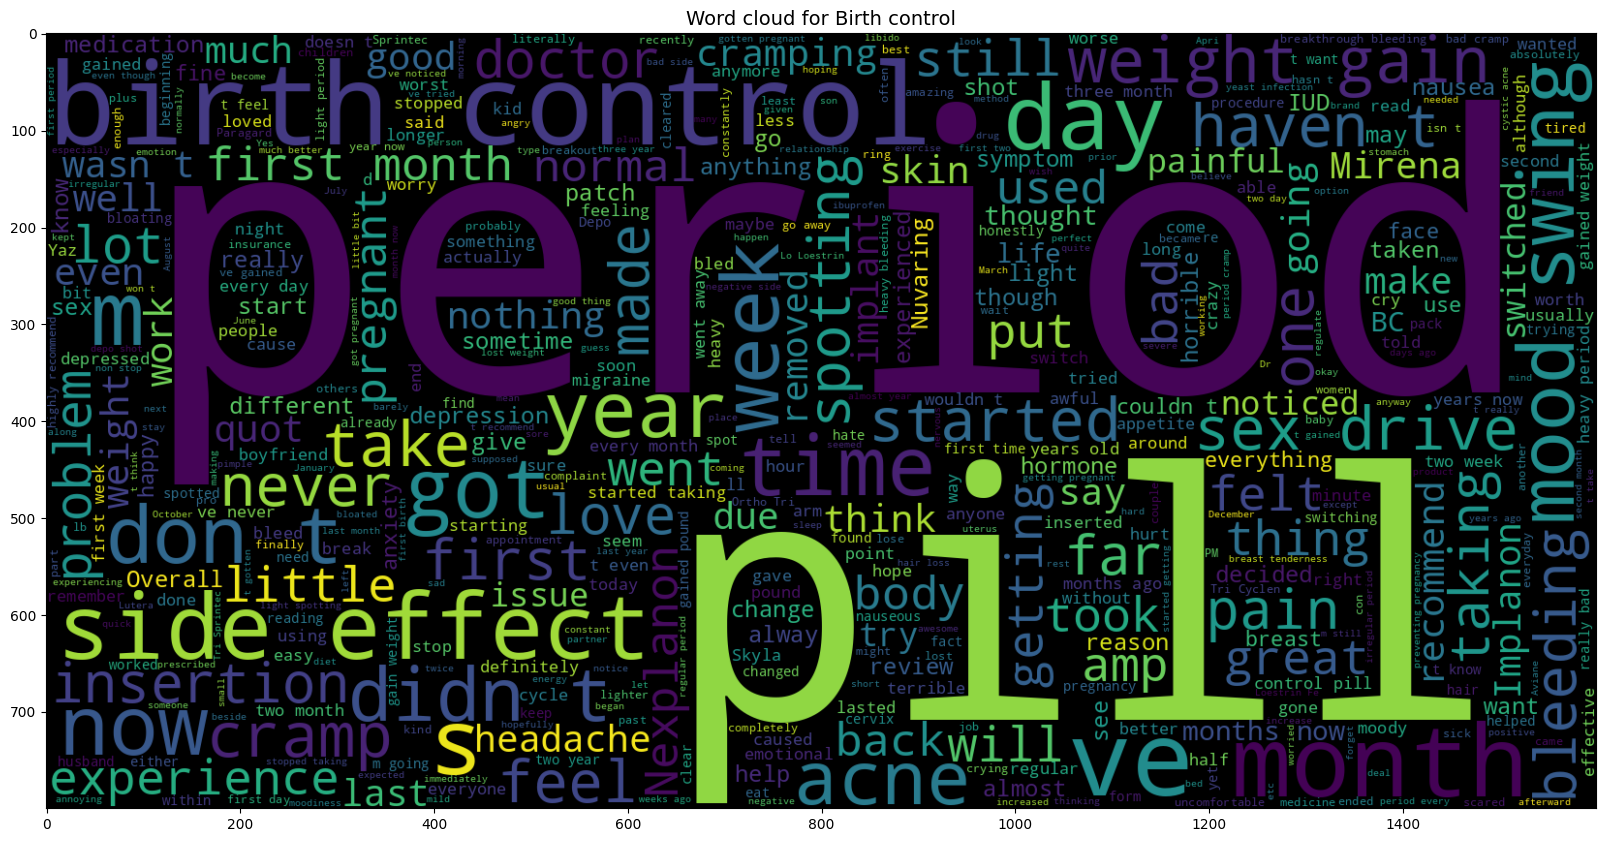

In [ ]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_birth.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Birth control',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Depression')

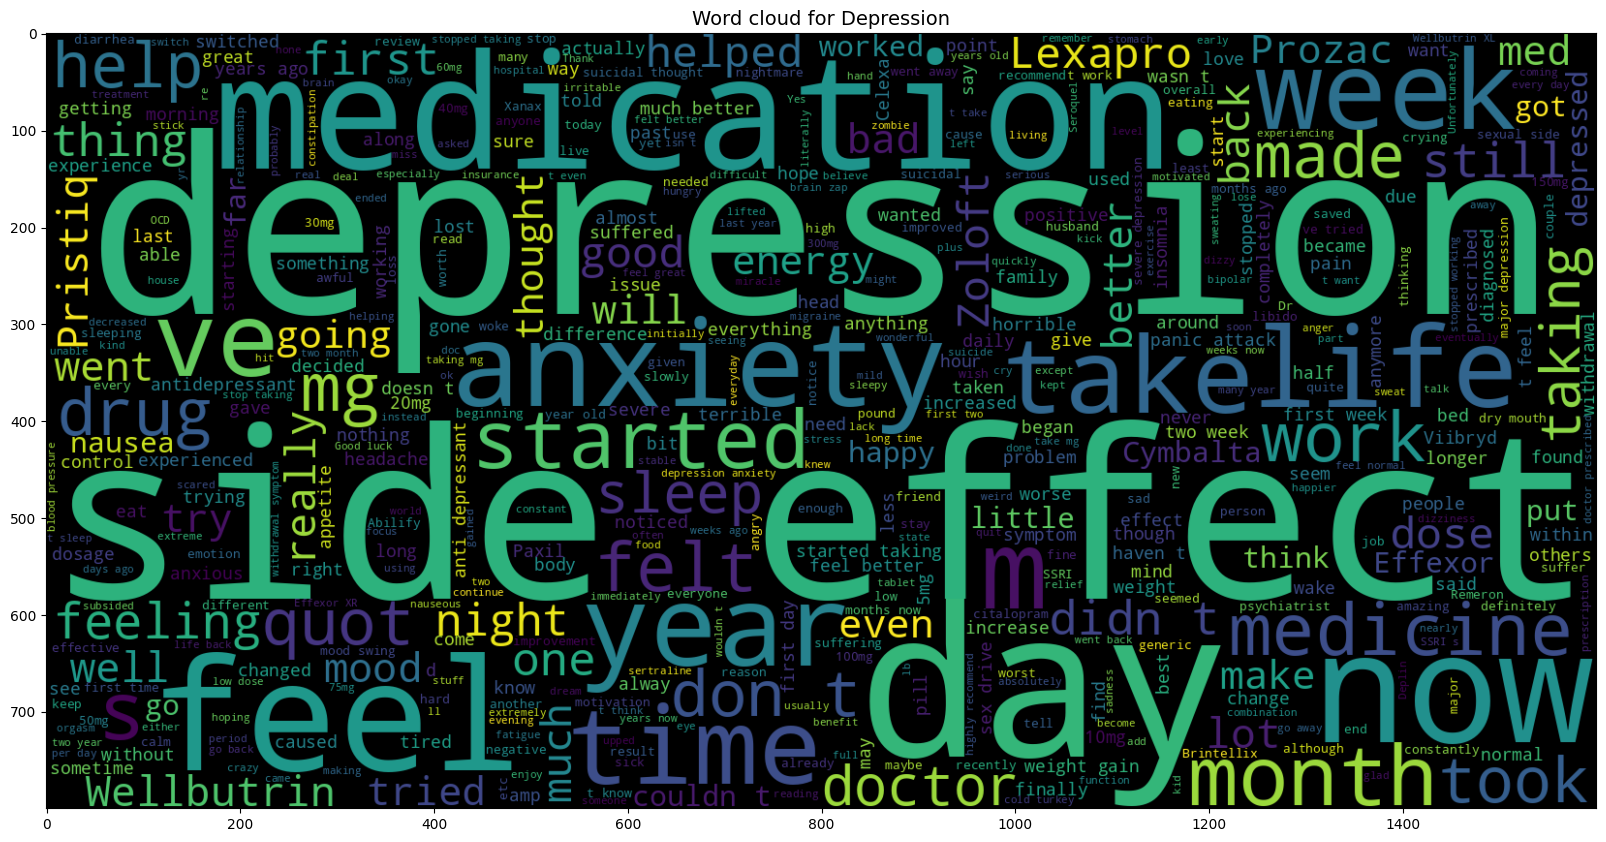

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_dep.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Depression',fontsize=14)

Text(0.5, 1.0, 'Word cloud for High Blood Pressure')

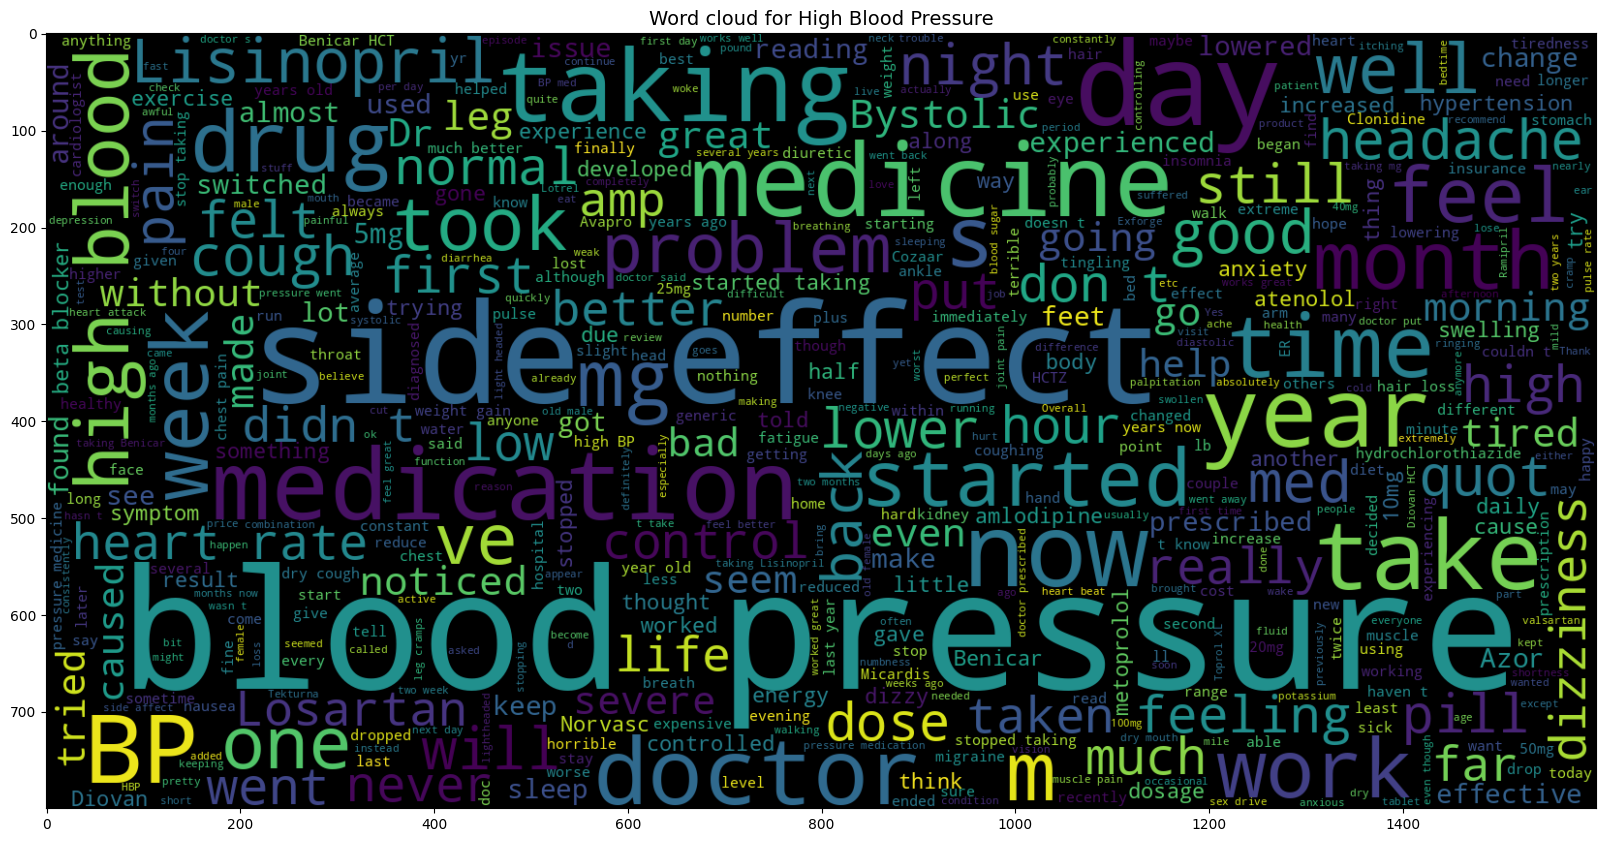

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_bp.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for High Blood Pressure',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Diabetes Type 2')

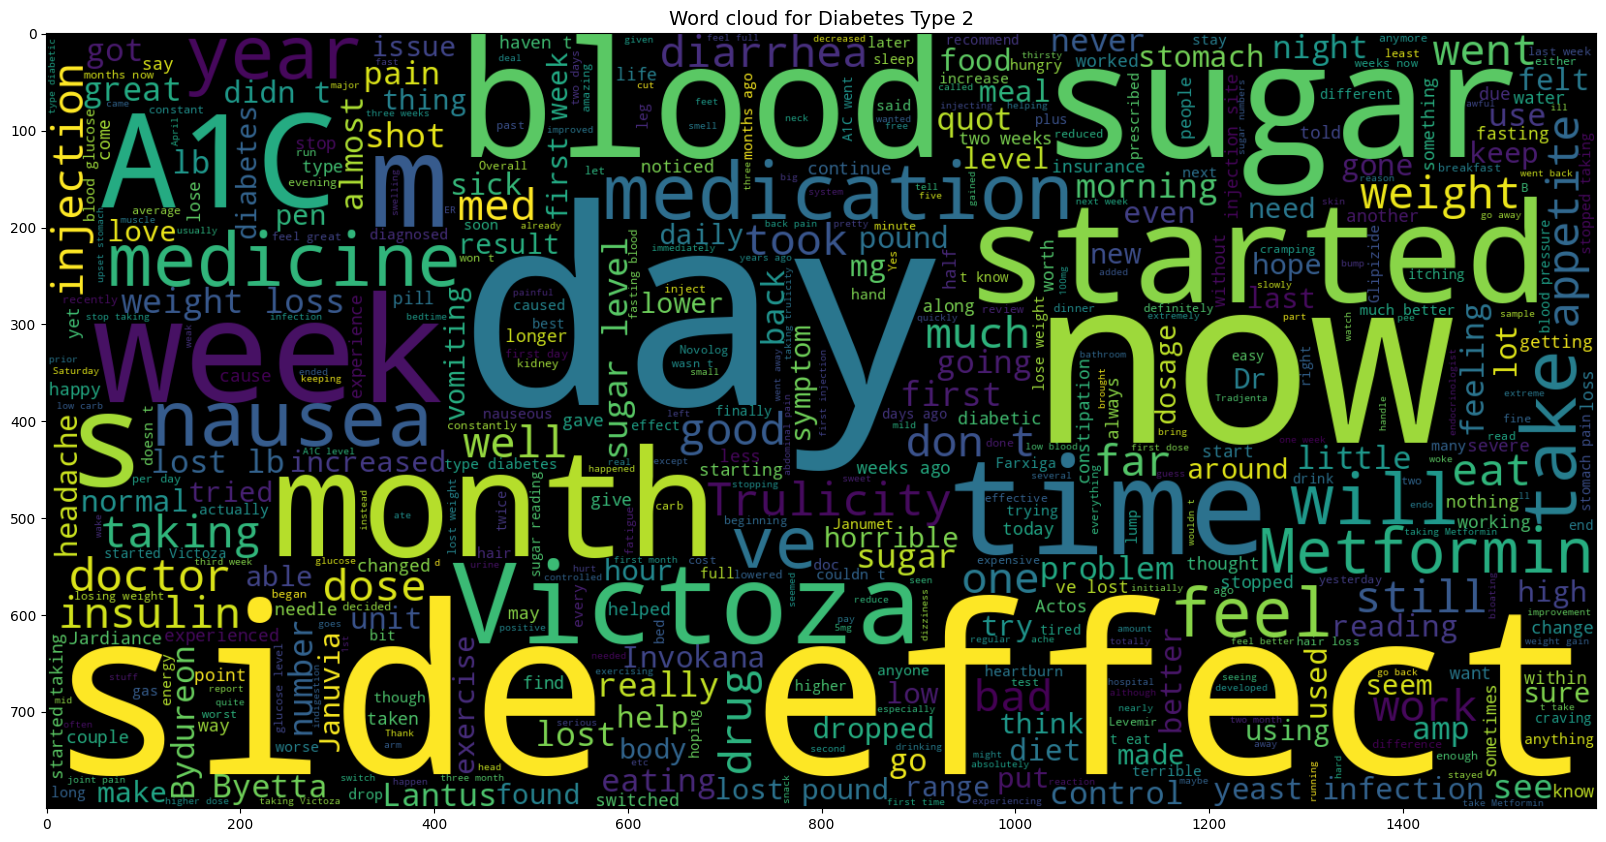

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_diab.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Diabetes Type 2',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Pain')

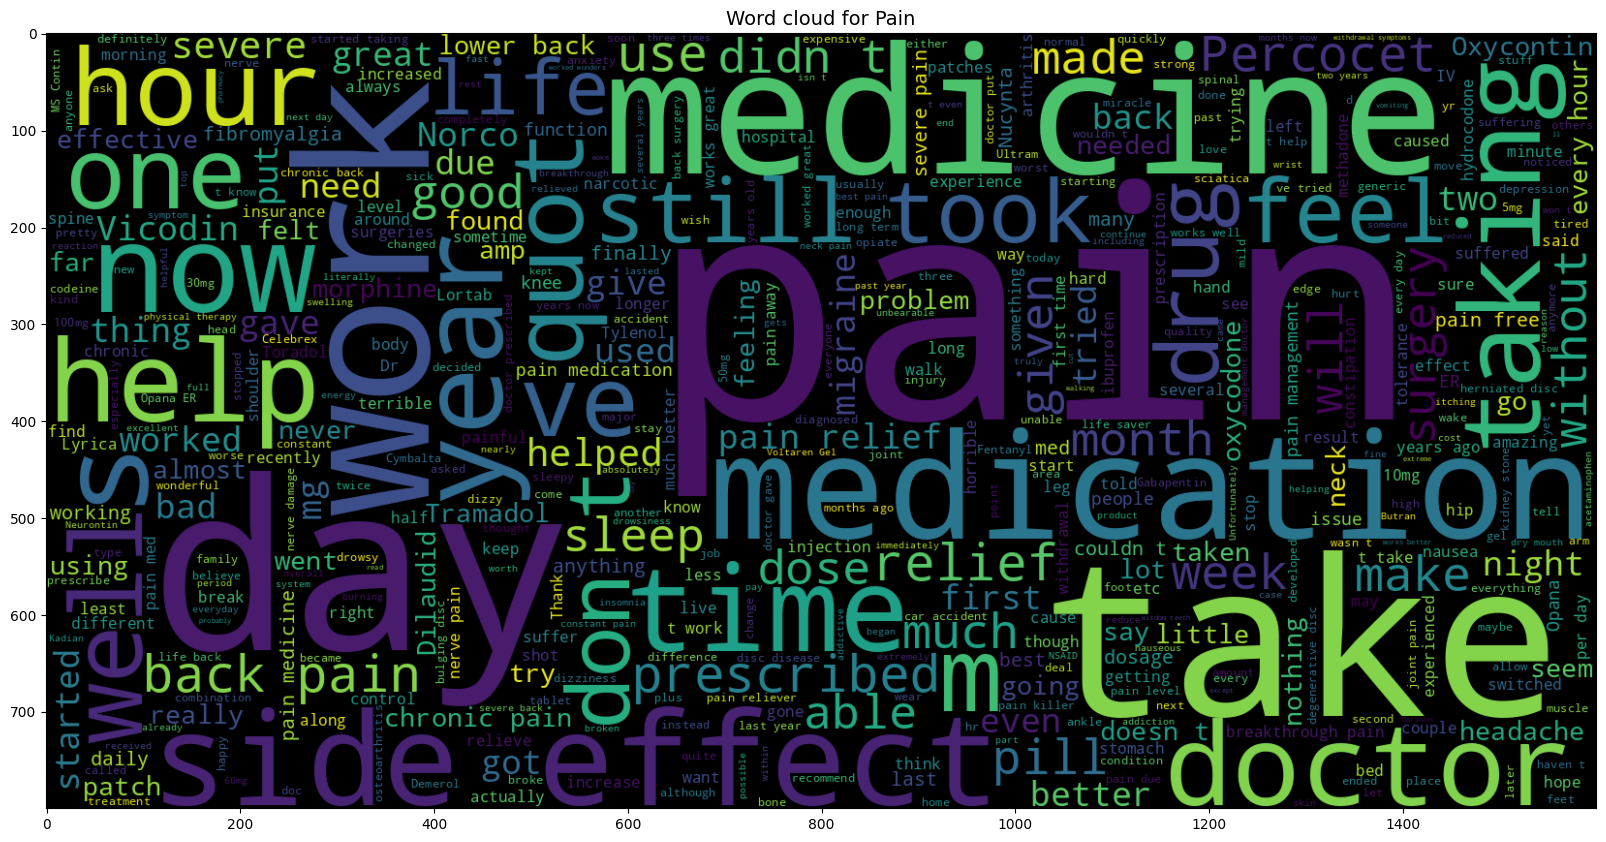

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_pai.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Pain',fontsize=14)

Text(0.5, 1.0, 'Word cloud for Anxiety')

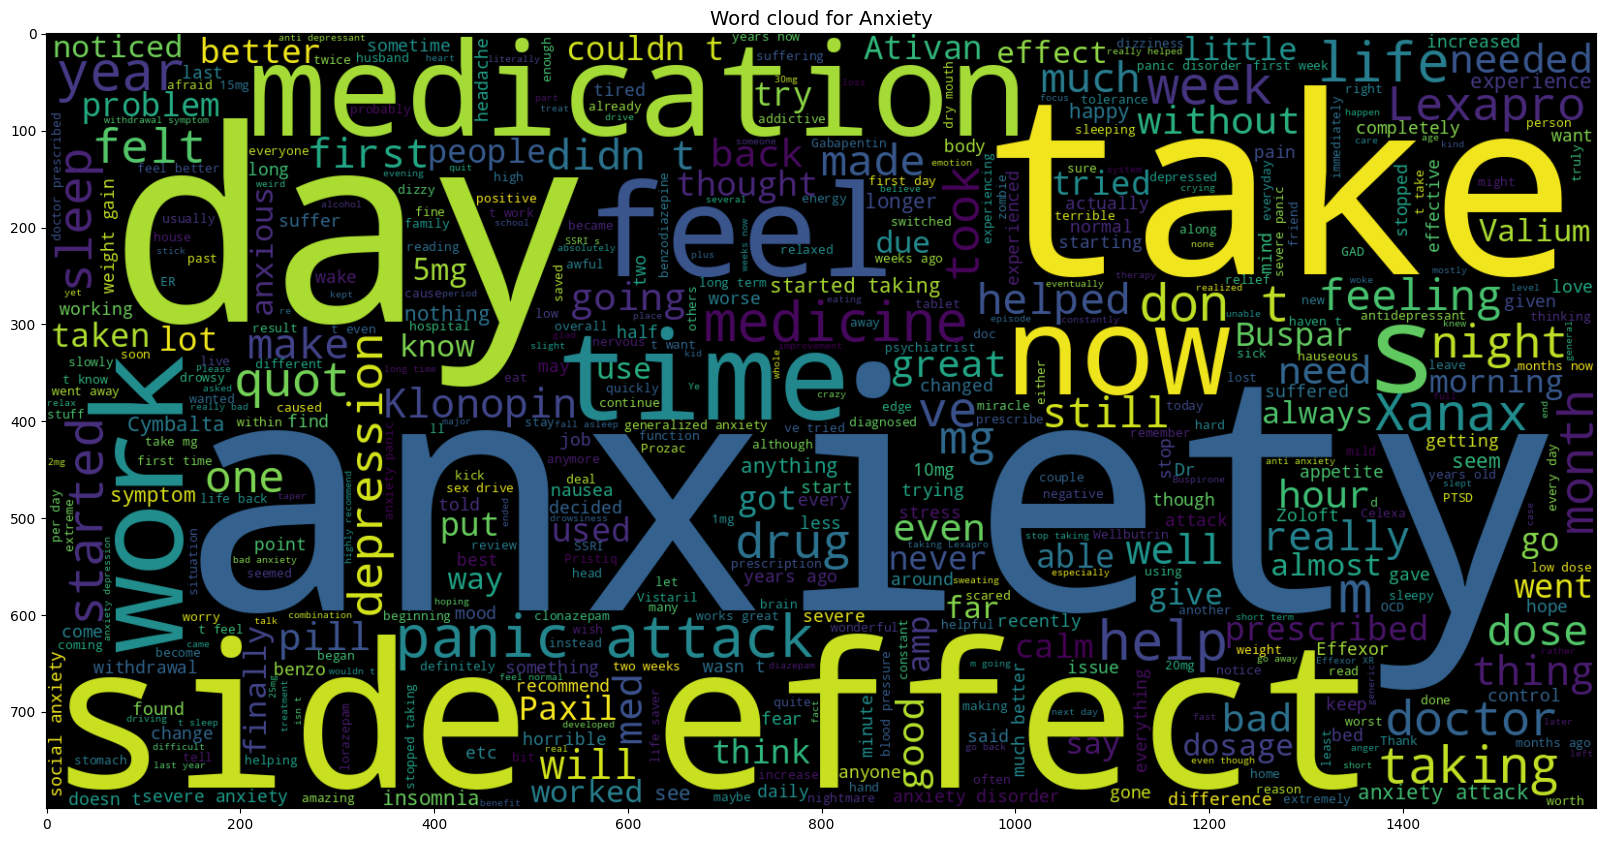

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_anx.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Anxiety',fontsize=14)

Text(0.5, 1.0, 'Word cloud for  Acnes')

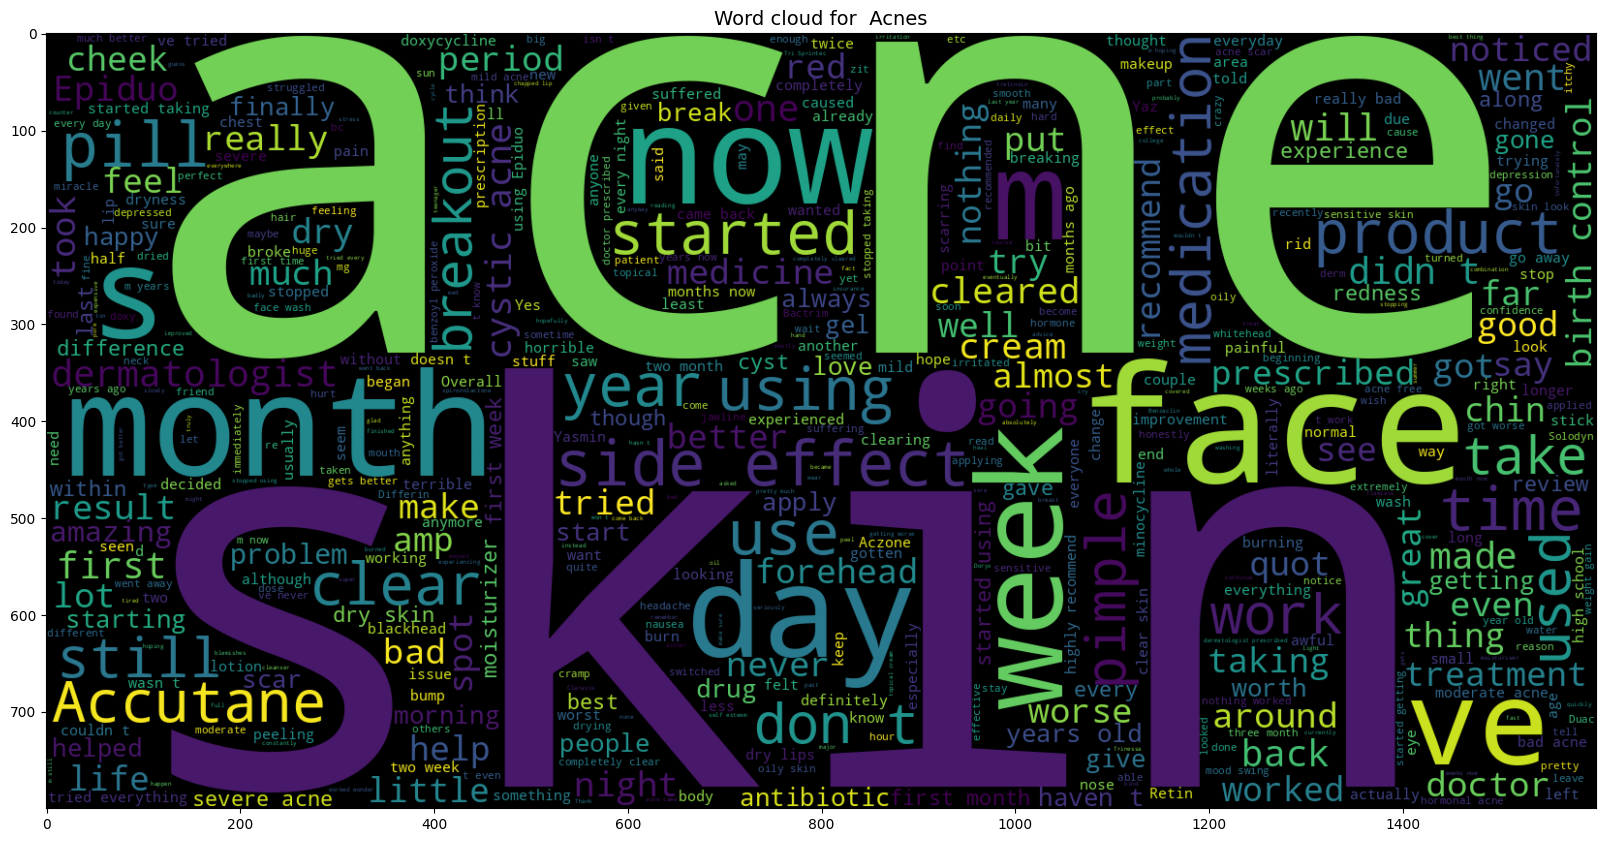

In [ ]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(X_acn.review))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for  Acnes',fontsize=14)

## data preprocessing

In [ ]:
#access the value in the review column of the Data
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [ ]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [ ]:
# to remove the quotation
for i, col in enumerate(X.columns):
    X.iloc[:, i] = X.iloc[:, i].str.replace('"', '')

In [ ]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', 50)

<ipython-input-63-a7edaab304c3>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [ ]:
X.head()

condition  \
2   Birth Control   
3   Birth Control   
9   Birth Control   
11  Depression      
14  Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  
2   I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.                                 
3   This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch                                                                                                                                                                                                                                                                                                                                                      
9   I had been on the pill for many years. When my doctor changed my RX to chateal, it was as effective. It really did help me by completely clearing my acne, this takes about 6 months though. I did not gain extra weight, or develop any emotional health issues. I stopped taking it bc I started using a more natural method of birth control, but started to take it bc I hate that my acne came back at age 28. I really hope symptoms like depression, or weight gain do not begin to affect me as I am older now. I&#039;m also naturally moody, so this may worsen things. I was in a negative mental rut today. Also I hope this doesn&#039;t push me over the edge, as I believe I am depressed. Hopefully it&#039;ll be just like when I was younger.                                                     
11  I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects.                                                                                                                                                                                                                                               

### stopwords 

In [ ]:
# import some libraries

import re                             #regular expressions
import string                         #string operations
import nltk                           # natural language processing
from nltk.corpus import stopwords     #stop words
from nltk.stem import WordNetLemmatizer  #lemmatization
import spacy                             #natural language processing with pre-trained models
from bs4 import BeautifulSoup           #parsing HTML and XML documents

# text preprocessing and analysis
nltk.download('stopwords')
nltk.download('wordnet')
nlp = spacy.load('en_core_web_sm')
lemmatizer = WordNetLemmatizer()


stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
stop

## Lemmitization



In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

porter = PorterStemmer()

lemmatizer = WordNetLemmatizer()

In [ ]:
# for steemering
print(porter.stem("sportingly"))
print(porter.stem("very"))
print(porter.stem("troubled"))

sportingli
veri
troubl


In [ ]:
# for lemmatizing
print(lemmatizer.lemmatize("sportingly"))
print(lemmatizer.lemmatize("very"))
print(lemmatizer.lemmatize("troubled"))

sportingly
very
troubled


In [ ]:
#for parsing and navigating HTML and XML documents.
from bs4 import BeautifulSoup


In [ ]:
def review_to_words(raw_review):
    # 1. Delete HTML
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords
    meaningful_words = [w for w in words if not w in stop]
    # 6. lemmitization
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(lemmitize_words))

In [ ]:
# clean and tokenize a text review.
X['review_clean'] = X['review'].apply(review_to_words)

<ipython-input-71-d3704c7e38b3>:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review, 'html.parser').get_text()


In [ ]:
X.head()

## Creating features and Target Variable

In [ ]:
X_feat=X['review_clean']
y=X['condition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_feat, y,stratify=y,test_size=0.2, random_state=0)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Bag of Words

In [ ]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [ ]:
count_train

## Machine Learning Model : Naive Bayes

accuracy:   0.911
Confusion matrix, without normalization


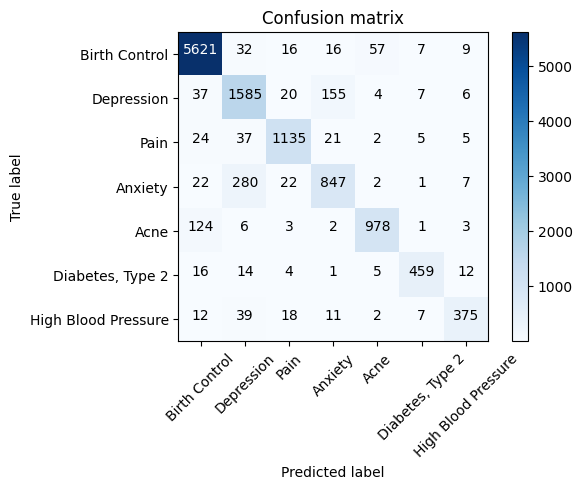

In [ ]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne','Diabetes, Type 2','High Blood Pressure'])

Accuracy:   0.911
                     precision    recall  f1-score   support

      Birth Control       0.93      0.88      0.90      1117
         Depression       0.80      0.72      0.76      1181
               Pain       0.96      0.98      0.97      5758
            Anxiety       0.80      0.87      0.83      1814
               Acne       0.94      0.90      0.92       511
   Diabetes, Type 2       0.90      0.81      0.85       464
High Blood Pressure       0.93      0.92      0.93      1229

           accuracy                           0.91     12074
          macro avg       0.89      0.87      0.88     12074
       weighted avg       0.91      0.91      0.91     12074

Confusion matrix, without normalization


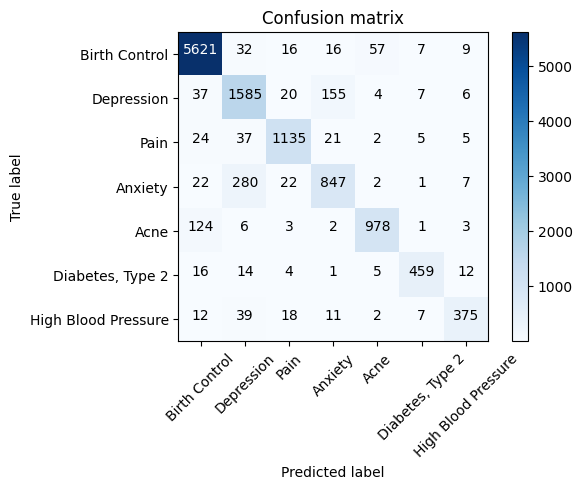

In [ ]:
from sklearn.metrics import classification_report

mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("Accuracy:   %0.3f" % score)

# Calculate precision, recall, and F1-score
report = classification_report(y_test, pred,
                               target_names=['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Diabetes, Type 2', 'High Blood Pressure'])
print(report)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Diabetes, Type 2', 'High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Diabetes, Type 2', 'High Blood Pressure'])


## Machine Learning Model : Passive Aggressive Classifier

accuracy:   0.926
Confusion matrix, without normalization


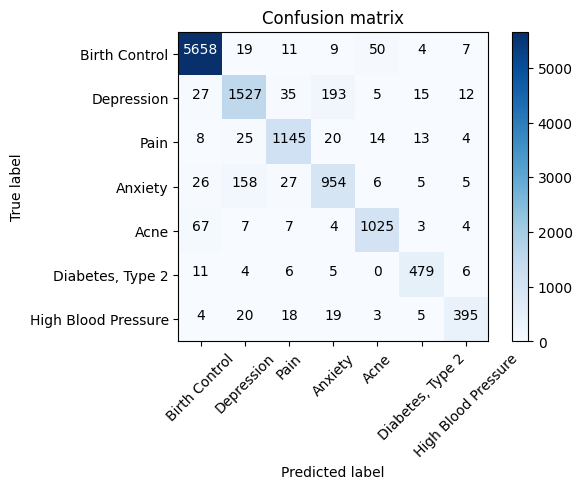

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Pain', 'Anxiety', 'Acne','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Pain', 'Anxiety', 'Acne','Diabetes, Type 2','High Blood Pressure'])

### TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

## Machine Learning Model : Naive Bayes

accuracy:   0.827
Confusion matrix, without normalization


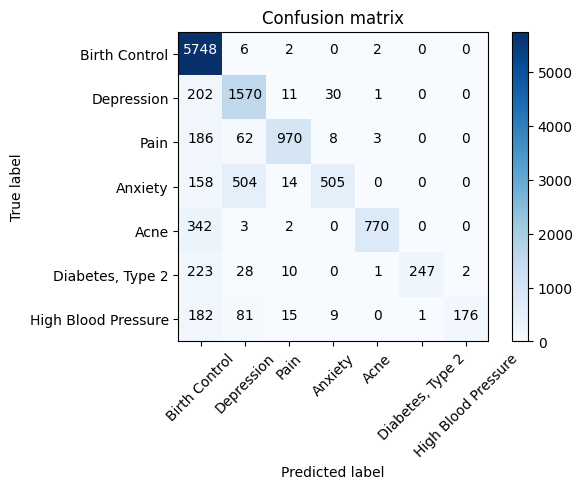

In [ ]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Pain', 'Anxiety', 'Acne','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Pain', 'Anxiety', 'Acne','Diabetes, Type 2','High Blood Pressure'])

## Machine Learning Model TFIDF

accuracy:   0.933
Confusion matrix, without normalization


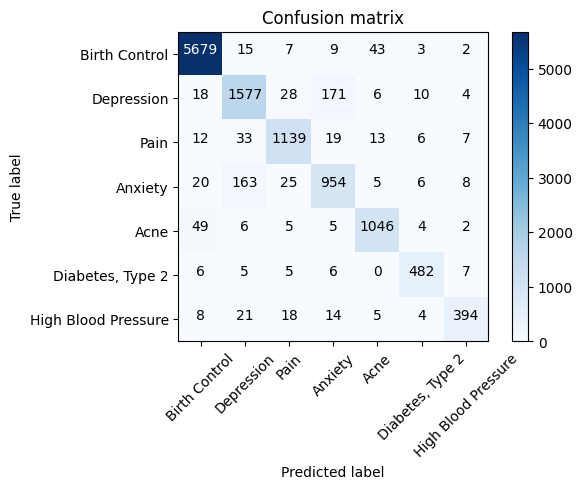

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Pain', 'Anxiety', 'Acne','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Pain', 'Anxiety', 'Acne','Diabetes, Type 2','High Blood Pressure'])


## TFIDF: Bigrams

In [ ]:
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train_2 = tfidf_vectorizer2.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer2.transform(X_test)

accuracy:   0.952
Confusion matrix, without normalization


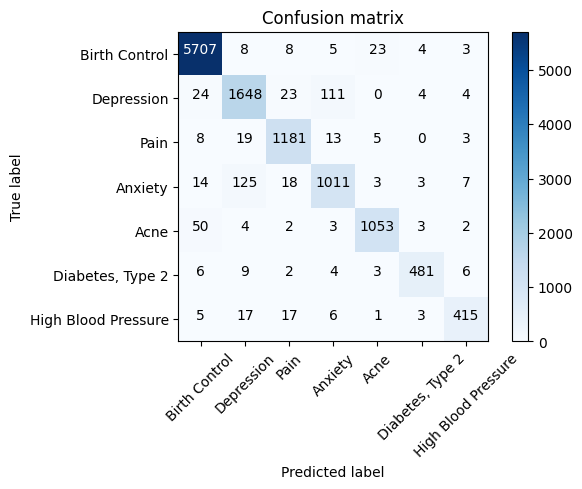

In [ ]:
pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_2, y_train)
pred = pass_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Pain', 'Anxiety', 'Acne','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Pain', 'Anxiety', 'Acne','Diabetes, Type 2','High Blood Pressure'])

## TFIDF : Trigrams

accuracy:   0.952
Confusion matrix, without normalization


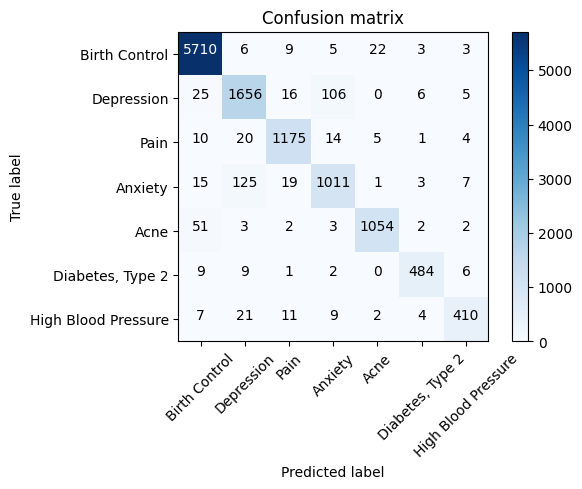

In [ ]:
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train_3 = tfidf_vectorizer3.fit_transform(X_train)
tfidf_test_3 = tfidf_vectorizer3.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train_3, y_train)
pred = pass_tf.predict(tfidf_test_3)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Pain', 'Anxiety', 'Acne','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Pain', 'Anxiety', 'Acne','Diabetes, Type 2','High Blood Pressure'])

## Most important Features

In [ ]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names_out()
    #old version = get_feature_names_out()
    #get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)



most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Birth Control')

Birth Control constipation saturday 3.5231672844148902
Birth Control feel sent 3.6659175504301276
Birth Control son implanon 3.7337268935237
Birth Control onexton time 3.9780104519335975
Birth Control drive pulling 4.706260867524514
Birth Control loved spotting 5.174204273744498
Birth Control longer minastrin 5.206339291259972
Birth Control drive nuvaring 5.227769347482577
Birth Control deep doxycycline 5.3394506480313195
Birth Control effect evening 6.253439454117096


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Depression')

Depression older pill 2.9161304119802187
Depression ssri male 3.0825325389273073
Depression slight hacking 3.7042487165974287
Depression overwhelmed going 3.745772491657735
Depression high think 4.251508331287157
Depression grade seventh 4.95628890197024
Depression able estrogen 5.047512141908589
Depression finally decide 5.753050646517023
Depression boy nauseous 6.656404172905964
Depression overpowering prepared 12.223198360176392


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Pain')

Pain minute depression 2.2389490045333713
Pain ibuprofen certainly 2.240991467724038
Pain helping def 2.2933490783686756
Pain clearing im 2.307404826232014
Pain actually migraine 2.3872720685117312
Pain vomiting make 2.458548888239939
Pain gp strongly 3.002231408305696
Pain wake hangover 3.1694571224806114
Pain possible ridiculous 4.1434219622571336
Pain pm bedtime 4.166954640327247


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Anxiety')

Anxiety disabilty 2.667120773826433
Anxiety disappeared happier 2.688788878732886
Anxiety calmness racing 2.8690941198344606
Anxiety fortunately 2.9302514386502505
Anxiety beyaz bad 3.1628346654405277
Anxiety huge live 3.42854874612113
Anxiety period wind 3.460132333637356
Anxiety commented active 5.302465507494342
Anxiety forgot remaining 6.9715931119315
Anxiety brand like 13.840120501660335


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Acne')

Acne hormone eventually 3.159478559316543
Acne manic shall 3.296204483301073
Acne recent breakout 3.4506457800662607
Acne bother noticed 3.4709615131232137
Acne favorably 4.041764989415757
Acne thing felt 4.5814595665498326
Acne starting smaller 4.606909500426656
Acne park attacked 5.21294241107384
Acne added trulicity 7.1060307605289115
Acne affect downside 8.853817628567137


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'High Blood Pressure')

High Blood Pressure cramped non 2.4708975759783356
High Blood Pressure coming seroquel 2.7111997395544525
High Blood Pressure sure fit 2.7626531398755354
High Blood Pressure point love 3.374248675021191
High Blood Pressure frequently warm 4.161923868934073
High Blood Pressure episode confusion 4.232795081588347
High Blood Pressure bleeding basically 4.297850938360343
High Blood Pressure diligence 4.584672227735426
High Blood Pressure liletta lasted 6.440270519640802
High Blood Pressure eyebrow completely 7.93331508622391


In [ ]:
most_informative_feature_for_class(tfidf_vectorizer2, pass_tf, 'Diabetes, Type 2')

Diabetes, Type 2 tramadol severe 2.2289648588483546
Diabetes, Type 2 skin smoother 2.3215089433961986
Diabetes, Type 2 replaced benzosiazepines 2.4794496051645956
Diabetes, Type 2 awesome looked 2.514388708876226
Diabetes, Type 2 touch breast 3.0007361336724183
Diabetes, Type 2 anxiety skeptical 3.0887206104234544
Diabetes, Type 2 erection 3.3088508667873007
Diabetes, Type 2 people work 4.108291127268098
Diabetes, Type 2 free pro 4.406439236075417
Diabetes, Type 2 frequent albeit 4.729617655393291


## Sample Predictions

In [ ]:
X.tail()

condition  \
161278  Diabetes, Type 2      
161286  Depression            
161287  Anxiety               
161290  High Blood Pressure   
161291  Birth Control         

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      review  \
161278  I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I  am losing so much weight. No side effects yet. Miracle medicine for me                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
161286  This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am  and changing asap.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
161287  I was super against taking medication. I&#039;ve started dealing with anxiety (some depression) for awhile now. I got prescribed Ativan months ago, and never took it. I thought I could handle myself again but then my relationship started to fail because of my over thinking. I went back to the doctor, and decided to try it. She prescribed me .50 3 times a day. I took a full one at night after a bad panic attack, and within 30 minutes I was calm and slept through the entire night. I have only been taking a half morning and mid afternoon and full at night because it does make you feel tired. My brain is in a slight fog, but nothing crazy, I still know whats going on though :) Give it a try if you are suffering. You will know after 1.   
161290  I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.                                                                                                                                                                                                                                                                                                                         
161291  This would be my second month on Junel. I&#039;ve been on Birth

In [ ]:
## Function for Extracting Top drugs

def top_drugs_extractor(condition):
    df_top = df[(df['rating']>=9)&(df['usefulCount']>=100)].sort_values(by = ['rating', 'usefulCount'], ascending = [False, False])
    drug_lst = df_top[df_top['condition']==condition]['drugName'].head(3).tolist()
    return drug_lst

In [ ]:
def predict_text(lst_text):
    df_test = pd.DataFrame(lst_text, columns = ['test_sent'])
    df_test["test_sent"] = df_test["test_sent"].apply(review_to_words)
    tfidf_bigram = tfidf_vectorizer3.transform(lst_text)
    prediction = pass_tf.predict(tfidf_bigram)
    df_test['prediction']=prediction
    return df_test

In [ ]:
sentences = [
  "I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations.",
    "This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap.",
    "I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losing so much weight. No side effects yet. Miracle medicine for me",

  ]

In [ ]:
tfidf_trigram = tfidf_vectorizer3.transform(sentences)


predictions = pass_tf.predict(tfidf_trigram)

for text, label in zip(sentences, predictions):
    if label=="High Blood Pressure":
        target="High Blood Pressure"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Depression":
        target="Depression"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Pain":
        target="Pain"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Anxiety":
        target="Anxiety"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Acne":
        target="Acne"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    elif label=="Diabetes, Type 2":
        target="Diabetes, Type 2"
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()
    else:
        target="Birth Control"
        print("text:", text, "\Condition:", target)
        top_drugs = top_drugs_extractor(label)
        print("text:", text, "\nCondition:", target)
        print("Top 3 Suggested Drugs:")
        print(top_drugs[0])
        print(top_drugs[1])
        print(top_drugs[2])
        print()

text: I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations. 
Condition: High Blood Pressure
Top 3 Suggested Drugs:
Losartan
Aldactone
Spironolactone

text: This is the third med I&#039;ve tried for anxiety and mild depression. Been on it for a week and I hate it so much. I am so dizzy, I have major diarrhea and feel worse than I started. Contacting my doc in the am and changing asap. 
Condition: Depression
Top 3 Suggested Drugs:
Sertraline
Zoloft
Viibryd

text: I just got diagnosed with type 2. My doctor prescribed Invokana and metformin from the beginning. My sugars went down to normal by the second week. I am losi

In [ ]:
df_testsent = predict_text(sentences)
df_testsent

test_sent  \
0  tekturna day effect immediate also calcium channel blocker tiazac hydrochlorothiazide put tekturna palpitation experienced diovan ugly drug opinion company produce however palpitation pretty bad diovan hour monitor ekg etc day substituting tekturna diovan palpitation   
1  third med tried anxiety mild depression week hate much dizzy major diarrhea feel worse started contacting doc changing asap                                                                                                                                                   
2  got diagnosed type doctor prescribed invokana metformin beginning sugar went normal second week losing much weight side effect yet miracle medicine                                                                                                                           

            prediction  
0  High Blood Pressure  
1  Depression           
2  Diabetes, Type 2

In [ ]:
import joblib
joblib.dump(tfidf_vectorizer3, 'tfidfvectorizer.pkl')
joblib.dump(pass_tf, 'passmodel.pkl')

['passmodel.pkl']

In [ ]:
vectorizer = joblib.load('tfidfvectorizer.pkl')
model = joblib.load('passmodel.pkl')

test = model.predict(vectorizer.transform(["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations"]))
test[0]

'High Blood Pressure'

In [ ]:
vectorizer = joblib.load('tfidfvectorizer.pkl')
model = joblib.load('passmodel.pkl')

test = model.predict(vectorizer.transform(["10mg per day of escitolopram oxalate"]))
test[0]

'Birth Control'

In [ ]:
vectorizer = joblib.load('tfidfvectorizer.pkl')
model = joblib.load('passmodel.pkl')

test = model.predict(vectorizer.transform(["Clinical depression runs in my family. My sister was clinically depressed at the age of 9. She and I were both sensitive, angry, sad, and sometimes suicidal. I have just lived with it, not really taking meds much. I have to notice a difference in a few days if I am going to stick with something. My aunt told my sister that the people in our family do well on Paxil. My sister felt that it worked for her for a year or two, so I started taking it because it has reached a point where I have to be happy or die from stress. the Paxil had a noticeable effect on my anxiety levels in a matter of days, and an effect on my level of general happiness in a matter of a week or two. The doctor prescribed 20 mg which I just can't take because it makes me too sleepy the next day. I take 10mg which was enough for the first month. Now 10 mg is almost not enough, I can feel the anxiety there sometimes but more Paxil will make me sleepy. My 10 year old son inherited the family depression problem, he's been talking about killing himself and others. He started taking Paxil also, I have noticed a big difference. He is not angry so much anymore. It is helping us truly. I usually won't take prescriptions, I think they make people sicker sometimes. I will keep taking this stuff as long as the benefits outweigh the problems."]))
test[0]

'Depression'